In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root='../Data',train= True, download= True, transform = transform)

In [7]:
test_data = datasets.MNIST(root='../Data', train= False, download= True, transform = transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image, label = train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

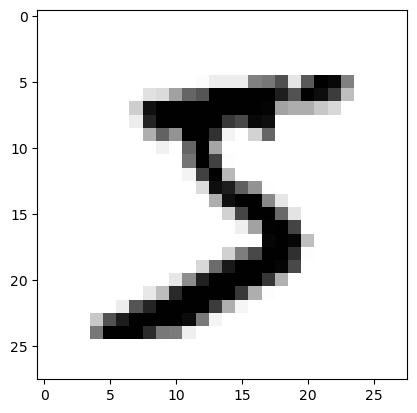

In [15]:
plt.imshow(image.reshape((28,28)),cmap = 'gist_yarg') # viridis 

In [16]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size = 100, shuffle = True) 
#Out of the 60,000 images of the training sets, feeding 100 images at a time

test_loader = DataLoader(test_data, batch_size = 500, shuffle = False)

In [17]:
from torchvision.utils import make_grid # make gridline

np.set_printoptions(formatter={'int': lambda x: f'{x:4}'}) #formatting

In [18]:
# first batch 
for images, labels in train_loader:
    # 60,000 /100 60 times
    break

In [19]:
images.shape

torch.Size([100, 1, 28, 28])

In [20]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


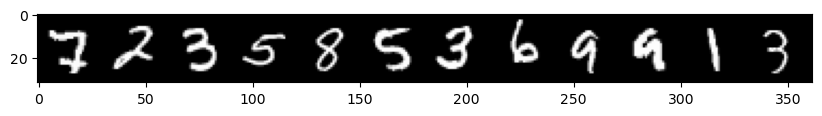

In [21]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [22]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz= 10, layers=[120,84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim = 1) #MULTI CLASS CLASSIFICATION

In [23]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# ANN ---> CNN

for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [25]:
# 105,214 total parameters

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
images.shape # --->[100,784]

torch.Size([100, 1, 28, 28])

In [28]:
images.view(100,-1).shape

torch.Size([100, 784])

In [30]:
import time
start_time = time.time()


# Training


# Trackers
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1 #start at 1
        
        
        # 10 neurons
        # [0.1,0.0,...,0.8] ---> 9
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1] # print(y_pred.data)
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            accuracy = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} batch{b} loss:{loss.item()} accuracy: {accuracy:.2f}%')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        
        for b, (X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    



total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')


Epoch 0 batch200 loss:0.23562385141849518 accuracy: 83.25%
Epoch 0 batch400 loss:0.3533070683479309 accuracy: 87.53%
Epoch 0 batch600 loss:0.13734401762485504 accuracy: 89.58%
Epoch 1 batch200 loss:0.24684999883174896 accuracy: 94.87%
Epoch 1 batch400 loss:0.14273890852928162 accuracy: 95.08%
Epoch 1 batch600 loss:0.0733654722571373 accuracy: 95.36%
Epoch 2 batch200 loss:0.08371471613645554 accuracy: 96.52%
Epoch 2 batch400 loss:0.06312298774719238 accuracy: 96.61%
Epoch 2 batch600 loss:0.06180889904499054 accuracy: 96.69%
Epoch 3 batch200 loss:0.11615169793367386 accuracy: 97.62%
Epoch 3 batch400 loss:0.05801045894622803 accuracy: 97.47%
Epoch 3 batch600 loss:0.03130992129445076 accuracy: 97.49%
Epoch 4 batch200 loss:0.10859694331884384 accuracy: 98.14%
Epoch 4 batch400 loss:0.04483110085129738 accuracy: 97.97%
Epoch 4 batch600 loss:0.055878061801195145 accuracy: 97.98%
Epoch 5 batch200 loss:0.008043684996664524 accuracy: 98.36%
Epoch 5 batch400 loss:0.03891099989414215 accuracy: 98.4

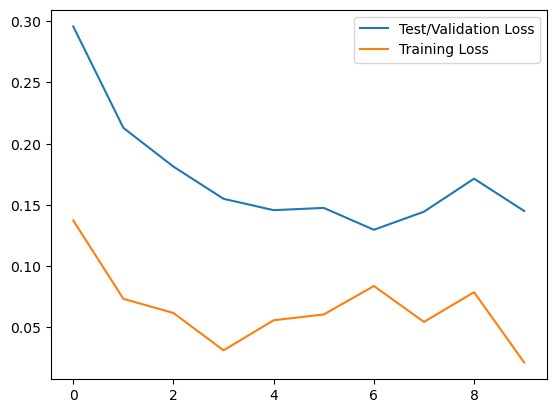

In [31]:
train_losses_num = [loss.item() for loss in train_losses]
plt.plot(test_losses,label='Test/Validation Loss')
plt.plot(train_losses_num, label ='Training Loss')
plt.legend()

In [32]:
train_correct[0]/600
train_acc = [t/600 for t in train_correct]

In [33]:
train_acc

[tensor(89.5817),
 tensor(95.3550),
 tensor(96.6950),
 tensor(97.4900),
 tensor(97.9850),
 tensor(98.4000),
 tensor(98.6750),
 tensor(98.9150),
 tensor(99.1233),
 tensor(99.2750)]

In [34]:
test_acc = [t/100 for t in test_correct]

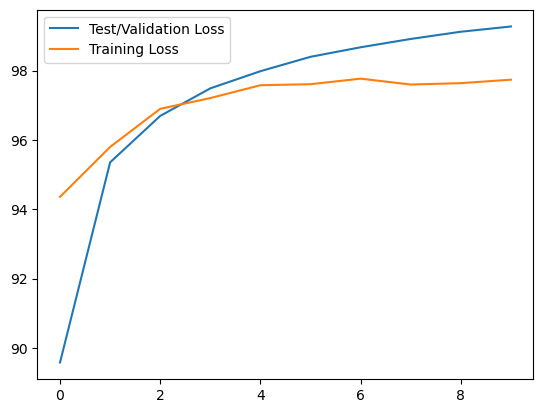

In [35]:
plt.plot(train_acc,label='Test/Validation Loss')
plt.plot(test_acc, label ='Training Loss')
plt.legend()

In [36]:
# New Unseen Data

test_load_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [37]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted ==y_test).sum()

In [38]:
100*correct.item()/len(test_data)

97.74

In [39]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 967,    0,    3,    0,    1,    2,    5,    1,    3,    1],
       [   0, 1128,    3,    0,    0,    0,    3,    7,    0,    2],
       [   1,    2, 1004,    3,    0,    0,    2,    8,    3,    0],
       [   3,    2,    7,  990,    0,   12,    1,    1,    3,    3],
       [   2,    0,    3,    0,  966,    3,    5,    3,    3,   10],
       [   1,    0,    0,    3,    0,  861,    4,    1,    4,    4],
       [   1,    1,    1,    0,    7,    2,  937,    0,    1,    0],
       [   1,    0,    4,    3,    0,    1,    0,  984,    2,    0],
       [   3,    2,    7,    5,    0,    9,    1,    3,  951,    3],
       [   1,    0,    0,    6,    8,    2,    0,   20,    4,  986]],
      dtype=int64)